In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16,8)

In [46]:
def get_df_click_and_results(cluster):
    lista_dir = [x[0] for x in os.walk(os.getcwd()) if len(x[0].split("/")[-1]) == 13
                and x[0].split("/")[-2] == cluster]
    
    def get_results(lista_dir, flag_click=True):
        df = pd.DataFrame()
        for i in lista_dir:
            try:
                if flag_click:
                    file = glob.glob(i+'/*_click.csv')[0]
                else:
                    file = glob.glob(i+'/*_mani.csv')[0]
                df_temp = pd.read_csv(file)
                df = pd.concat([df, df_temp], axis=0)
#                 print(file)
            except IndexError:
#                 print('====no tiene resultados======')
#                 print(i)
                continue

        df.drop('Unnamed: 0',1,inplace=True)
        df.reset_index(drop=True,inplace=True)
        return df
    
    df_click = get_results(lista_dir, flag_click=True)
    df_click['proteinaA_proteinaB'] = df_click.proteinaA_proteinaB.str.replace('-','_')
    
    df_mani = get_results(lista_dir, flag_click=False)
    df_mani['SO'] = df_mani.SO * 100
    
    df_result = df_mani.merge(df_click,on='proteinaA_proteinaB',suffixes=["_mani","_click"])
    df_result['cluster'] = cluster
    
    return df_result

In [47]:
df = get_df_click_and_results('cluster_95')

In [48]:
df.sort_values('SO_mani')[['proteinaA_proteinaB', 'SO_mani', 'SO_click']]

,proteinaA_proteinaB,SO_mani,SO_click
24,5FHX_H_5HCG_H,64.76,70.78
12,3PHQ_B_3PHO_B,97.58,99.53
8,2IJ9_A_2IJ9_B,97.66,98.13
16,1W7P_A_1U5T_A,98.12,98.12
6,5IR0_A_5IR0_B,99.00,99.00
3,4ETV_A_4ETV_B,99.23,99.23
13,3I57_A_3I57_B,99.46,97.83
1,4PUC_A_4PUC_B,99.79,99.79
23,3H1Q_A_3H1Q_B,100.00,100.00
22,6BR8_A_6BR8_B,100.00,100.00


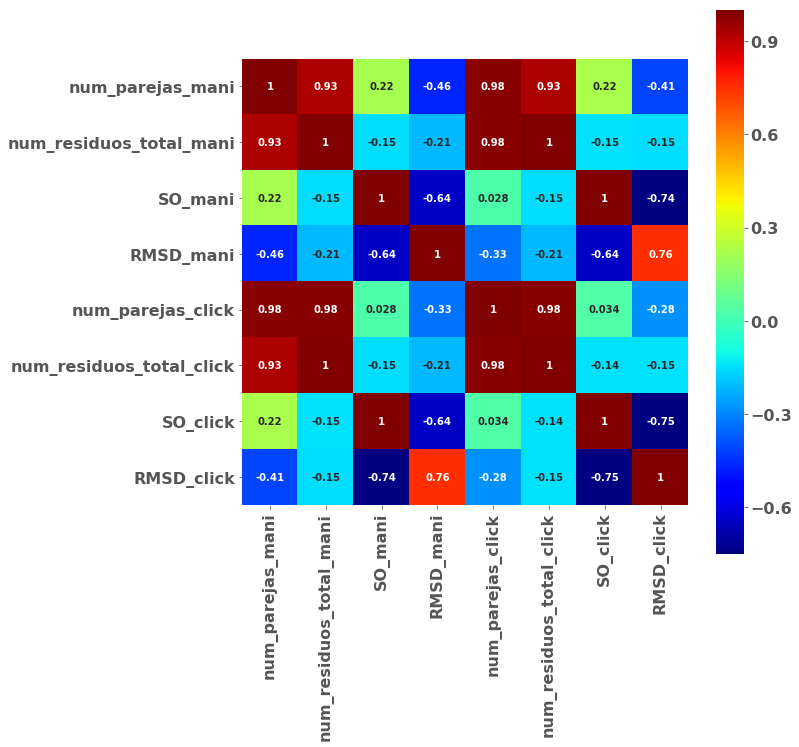

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), cmap='jet',annot=True,square=True)

3

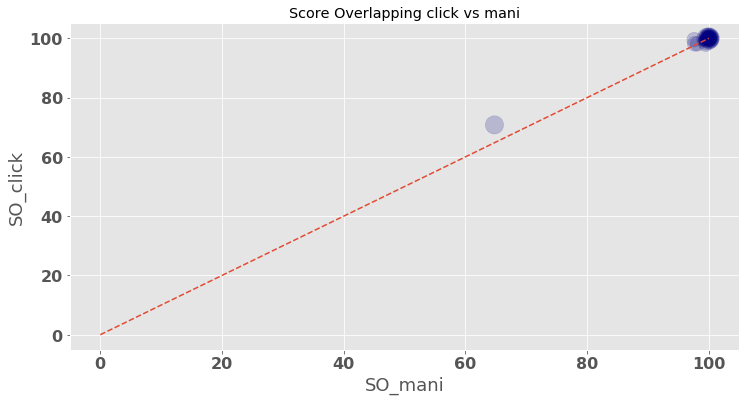

In [7]:
marker_size = df.num_residuos_total_click
# plt.figure(figsize=(20,10))
df.plot(kind='scatter',x='SO_mani',y='SO_click', alpha=0.2, 
               title='Score Overlapping click vs mani',s=marker_size,
              color='navy', figsize=(12,6))
plt.plot([0,100],[0,100],'--')
# plt.xlim(45,103)
3 # plt.ylim(45,103)

# concatenacion de resultados

In [313]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 250)

In [55]:
df = get_df_click_and_results('cluster_30')

for i in ['cluster_50','cluster_70','cluster_95']:
    df_temp = get_df_click_and_results(i)
    df = pd.concat([df, df_temp])
    
df.reset_index(inplace=True, drop=True)
df['diff_SO'] = df.SO_click - df.SO_mani

In [60]:
df.columns

Index(['proteinaA_proteinaB', 'grupo_mani', 'cliques_ganadores_mani',
       'num_parejas_mani', 'num_residuos_total_mani', 'SO_mani', 'RMSD_mani',
       'parejas_mani', 'grupo_click', 'cliques_ganadores_click',
       'num_parejas_click', 'num_residuos_total_click', 'SO_click',
       'RMSD_click', 'parejas_click', 'cluster', 'diff_SO'],
      dtype='object')

In [63]:
df.sort_values('SO_mani')[[
    'proteinaA_proteinaB', 'SO_mani', 'SO_click','RMSD_mani','RMSD_click','cluster','num_residuos_total_click']].reset_index(
    drop=True).to_csv("clickvsmani_all_exp.csv")

In [268]:
corte_num_res = pd.qcut(df.num_residuos_total_click,4)
df['q1'] = corte_num_res
df['size'] = df.q1.cat.rename_categories(["X", "s", "v","P"])
df.head()


,proteinaA_proteinaB,grupo_mani,cliques_ganadores_mani,num_parejas_mani,num_residuos_total_mani,SO_mani,RMSD_mani,parejas_mani,grupo_click,cliques_ganadores_click,num_parejas_click,num_residuos_total_click,SO_click,RMSD_click,parejas_click,cluster,diff_SO,q,q1,size
0,3SHP_A_3SHP_B,model_s,"[[64, 65, 74, 48, 66, 46, 47], [71, 72, 81, 55...",137,154,88.960000,1.550900,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...",click,[],140,154,90.910000,1.200000,[],cluster_30,1.950000,"(131.5, 182.5]","(131.5, 182.5]",s
1,4CCG_X_4CCG_Y,model_s,"[[12, 32, 17, 16, 33, 31, 15], [16, 36, 21, 20...",65,67,97.010000,0.753000,"[(2, 6), (3, 7), (4, 8), (5, 9), (6, 10), (7, ...",click,[],65,67,97.010000,0.370000,[],cluster_30,0.000000,"(19.999, 131.5]","(19.999, 131.5]",X
2,2H1T_A_2H1T_B,model_s,"[[15, 32, 31, 40, 33, 34, 14], [17, 34, 33, 42...",183,183,100.000000,0.213600,"[(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9...",click,[],183,183,100.000000,0.250000,[],cluster_30,0.000000,"(182.5, 287.5]","(182.5, 287.5]",v
3,5VG9_A_5V7P_A,model_s,"[[68, 69, 70, 64, 65, 67, 11], [79, 80, 81, 75...",278,279,100.000000,0.614700,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...",click,[],279,280,100.000000,0.520000,[],cluster_30,0.000000,"(182.5, 287.5]","(182.5, 287.5]",v
4,5CWS_F_5CWS_L,model_s,"[[1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7]]",40,40,100.000000,0.356000,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...",click,[],40,40,100.000000,0.420000,[],cluster_30,0.000000,"(19.999, 131.5]","(19.999, 131.5]",X


Text(0,0.5,'SS_click')

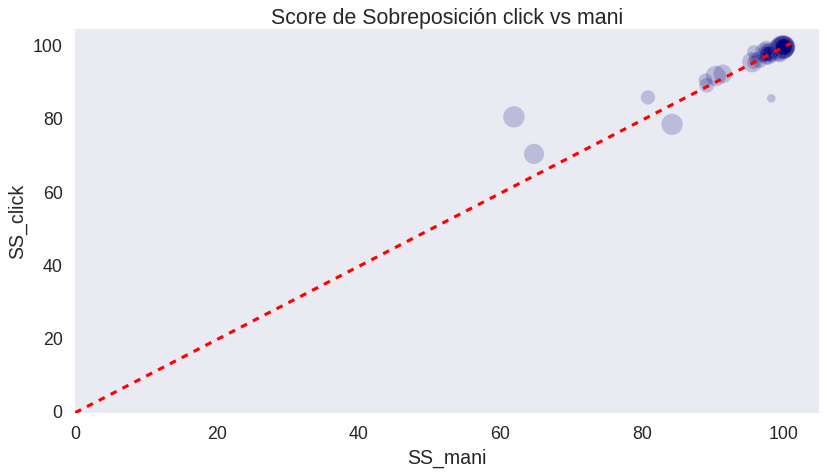

In [269]:
marker_size = df.num_residuos_total_click

df.plot(kind='scatter',x='SO_mani',y='SO_click', alpha=0.2, 
               title='Score de Sobreposición click vs mani',s=marker_size,
              color='navy', figsize=(12,6))
plt.plot([0,101],[0,101],'--',color="r")
plt.xlim(0,105)
plt.ylim(0,105)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")

# plt.savefig("SSclickvsmani.png");

In [277]:
plt.style.use('seaborn-white')

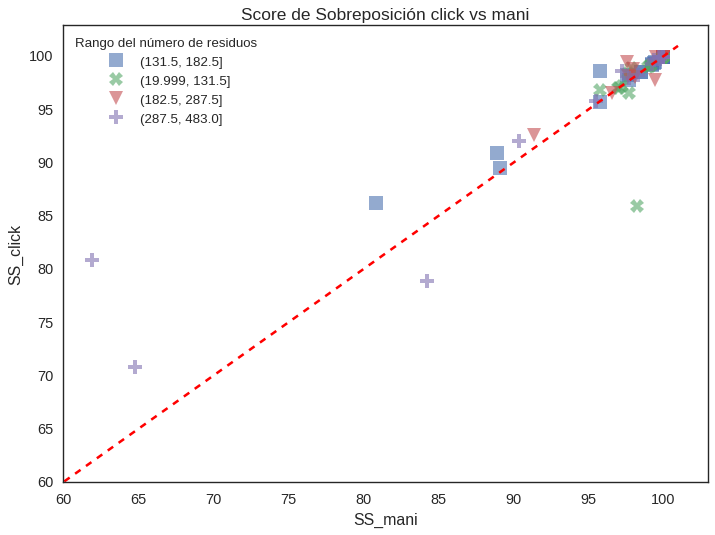

In [288]:
for i in df['size'].unique():
    X = df[df['size']==i].SO_mani.values
    y = df[df['size']==i].SO_click.values
    label = df[df['size']==i].q1.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker=i, alpha=0.6, label=label,ms=12)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Rango del número de residuos", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")
plt.savefig("SSclickvsmani.png")

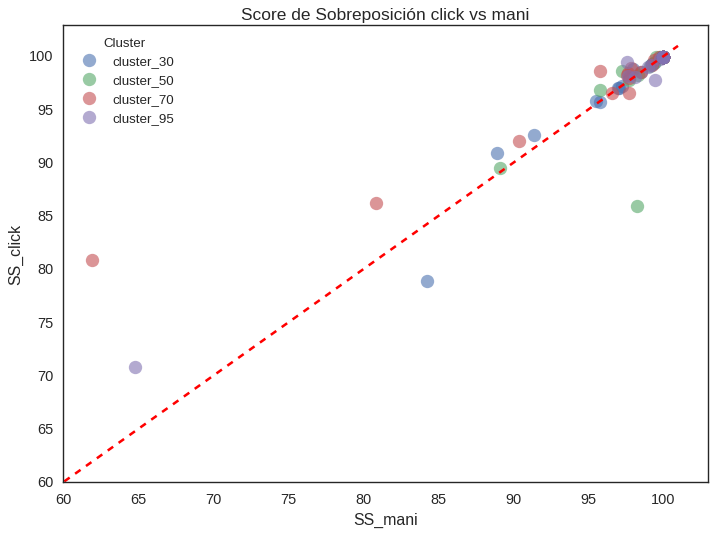

In [333]:
for i in df['cluster'].unique():
    X = df[df['cluster']==i].SO_mani.values
    y = df[df['cluster']==i].SO_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', alpha=0.6, label=label, ms=12)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")

In [294]:
# porcentaje que le ganemos a click
(df[df.SO_mani >= df.SO_click].shape[0]/df.shape[0])*100

71.875

In [295]:
# porcentaje que nos gana click
(df[df.SO_click > df.SO_mani].shape[0]/df.shape[0])*100

28.125

In [296]:
# porcentaje que nos gana click
(df[df.SO_click == df.SO_mani].shape[0]/df.shape[0])*100

67.70833333333334

Text(0,0.5,'SS_click')

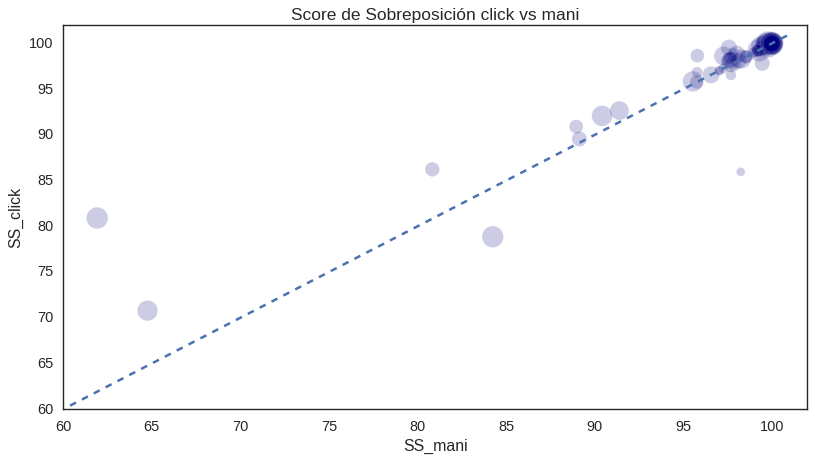

In [111]:
marker_size = df.num_residuos_total_click
# plt.figure(figsize=(20,10))
df.plot(kind='scatter',x='SO_mani',y='SO_click', alpha=0.2, 
               title='Score de Sobreposición click vs mani',s=marker_size,
              color='navy', figsize=(12,6))
plt.plot([0,101],[0,101],'--')
plt.xlim(60,102)
plt.ylim(60,102)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")

In [311]:
corr = df.corr().loc['SO_mani','SO_click'].round(3)
rmse = np.sqrt(mean_squared_error(df.SO_click, df.SO_mani)).round(3)
perc_rmse = ((rmse/df.SO_click.mean())*100).round(3)

In [318]:
me =pd.DataFrame([corr,rmse,perc_rmse],columns=['metricas de evaluación'], index=['Correlación',"RMSE","RMSE_Porcentual"])
me.T.to_csv("metricas_evaluacion_manivsclick.csv")
me.T

,Correlación,RMSE,RMSE_Porcentual
metricas de evaluación,0.911,2.576,2.628


In [11]:
print(corr,rmse)

0.911006813409193 2.5756338216705683


# Analisis RMSD

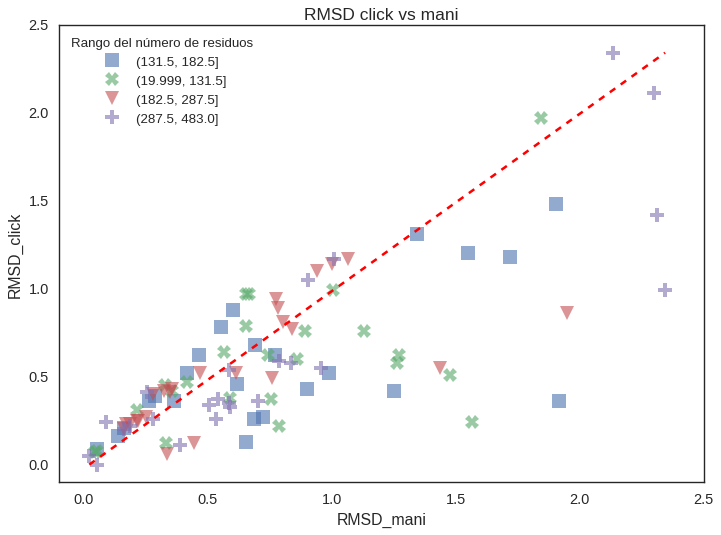

In [329]:
# df.plot(kind='scatter',x='RMSD_mani',y='RMSD_click', alpha=0.4, 
#                title='RMSD click vs mani',s=marker_size,
#               color='navy', figsize=(12,6))

for i in df['size'].unique():
    X = df[df['size']==i].RMSD_mani.values
    y = df[df['size']==i].RMSD_click.values
    label = df[df['size']==i].q1.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker=i, alpha=0.6, label=label,ms=12)
    

plt.title('RMSD click vs mani')
plt.legend(loc=0, title="Rango del número de residuos", fontsize='medium',fancybox = True)
plt.xlim(-0.1,)
plt.ylim(-0.1,)
plt.xlabel("RMSD_mani")
plt.ylabel("RMSD_click")
plt.plot([df.RMSD_mani.min(),df.RMSD_mani.max()],[df.RMSD_click.min(),df.RMSD_click.max()],'--', color="r")
# plt.savefig("RMSDclickvsmani.png")

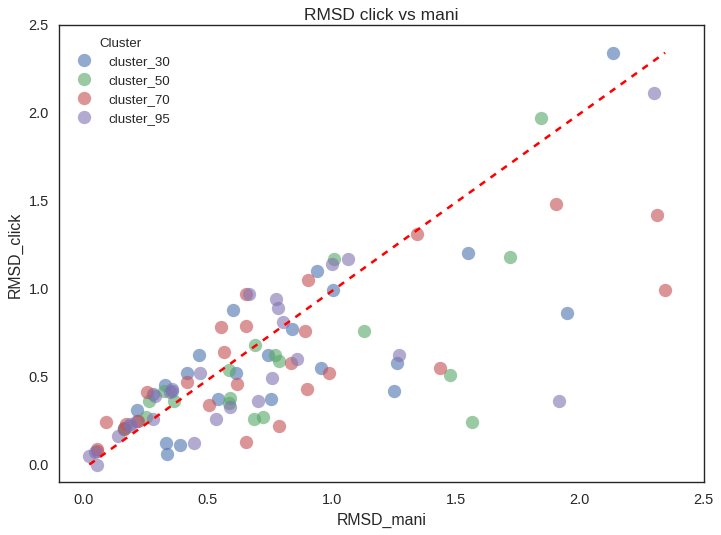

In [342]:

for i in df['cluster'].unique():
    X = df[df['cluster']==i].RMSD_mani.values
    y = df[df['cluster']==i].RMSD_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker="o", alpha=0.6, label=label,ms=12)
    

plt.title('RMSD click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(-0.1,)
plt.ylim(-0.1,)
plt.xlabel("RMSD_mani")
plt.ylabel("RMSD_click")
plt.plot([df.RMSD_mani.min(),df.RMSD_mani.max()],[df.RMSD_click.min(),df.RMSD_click.max()],'--', color="r")
# plt.savefig("RMSDclickvsmani.png")

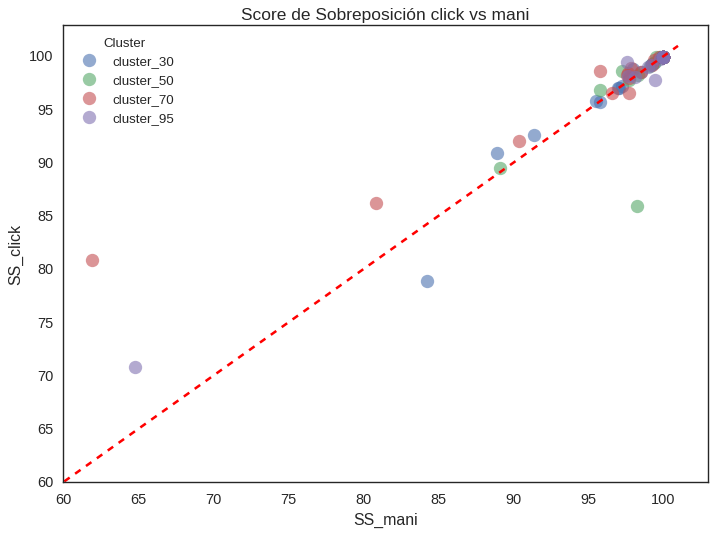

In [334]:
for i in df['cluster'].unique():
    X = df[df['cluster']==i].SO_mani.values
    y = df[df['cluster']==i].SO_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', alpha=0.6, label=label, ms=12)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")

In [330]:
# porcentaje que le ganemos a click
(df[df.RMSD_mani >= df.RMSD_click].shape[0]/df.shape[0])*100

53.125

In [331]:
# porcentaje que nos gana click
(df[df.RMSD_click > df.RMSD_mani].shape[0]/df.shape[0])*100

46.875

In [332]:
# porcentaje que nos gana click
(df[df.RMSD_click == df.RMSD_mani].shape[0]/df.shape[0])*100

0.0

In [346]:
(df.RMSD_click - df.RMSD_mani).mean()

-0.16435000000000002

## Diferencia de SO

In [347]:
df['diff_SO'] = df['diff_SO'].astype(float).round(4)

In [348]:
df[df.diff_SO != 0].sort_values('diff_SO', ascending=False)[['proteinaA_proteinaB','cluster','SO_mani','SO_click', 'diff_SO']]

,proteinaA_proteinaB,cluster,SO_mani,SO_click,diff_SO
47,4BWP_A_4BWP_B,cluster_70,61.920,80.910,18.990
94,5FHX_H_5HCG_H,cluster_95,64.760,70.780,6.020
66,2ZMF_A_2ZMF_B,cluster_70,80.840,86.230,5.390
45,3OI8_A_3OI8_B,cluster_70,95.800,98.670,2.870
0,3SHP_A_3SHP_B,cluster_30,88.960,90.910,1.950
82,3PHQ_B_3PHO_B,cluster_95,97.580,99.530,1.950
61,3EUC_A_3EUC_B,cluster_70,90.420,92.080,1.660
43,3C5W_P_3C5V_A,cluster_50,97.280,98.640,1.360
15,2XXZ_A_2XXZ_B,cluster_30,91.400,92.660,1.260
56,3ZZO_A_3ZZR_A,cluster_70,97.850,98.920,1.070


In [352]:
df.diff_SO.mean().round(3)

0.292

# Analisis dinamicas dimer con cofact vs tetra con cofact

In [15]:
df = pd.read_csv('result_dinamic_dimer_con_cofact_vs_tetra_con_cofact.csv')

In [18]:
df.drop('Unnamed: 0',1,inplace=True)

In [24]:
df['orden'] = df.proteinaA_proteinaB.str.split("_").str[-1].astype(int)

In [26]:
df.sort_values('orden', inplace=True)

In [31]:
df

,proteinaA_proteinaB,grupo,cliques_ganadores,num_parejas,num_residuos_total,SO,RMSD,parejas,orden
0,first_dimer_con_cofact_tetra_con_cofact_0,model_s,"[[18, 17, 19, 16, 15, 21, 20], [18, 17, 19, 16...",201,352,0.6116,2.3062,"[(8, 9), (11, 10), (14, 13), (15, 16), (18, 17...",0
6,first_dimer_con_cofact_tetra_con_cofact_17,model_s,"[[24, 22, 23, 18, 19, 20, 21], [13, 11, 12, 7,...",216,352,0.6522,2.2862,"[(2, 1), (5, 4), (6, 6), (10, 7), (11, 8), (12...",17
3,first_dimer_con_cofact_tetra_con_cofact_106,model_s,"[[192, 191, 195, 227, 228, 226, 224], [192, 19...",259,352,0.7855,2.0193,"[(0, 0), (5, 4), (6, 7), (11, 8), (13, 9), (14...",106
1,first_dimer_con_cofact_tetra_con_cofact_115,model_s,"[[187, 192, 193, 188, 189, 190, 191], [187, 19...",208,352,0.6522,2.2536,"[(5, 170), (6, 169), (7, 168), (10, 8), (13, 1...",115
4,first_dimer_con_cofact_tetra_con_cofact_124,model_s,"[[228, 227, 223, 192, 226, 195, 224], [228, 22...",275,352,0.7983,1.8902,"[(1, 0), (2, 1), (5, 4), (6, 6), (7, 7), (8, 1...",124
2,first_dimer_con_cofact_tetra_con_cofact_132,model_s,"[[14, 16, 15, 12, 13, 146, 10], [190, 192, 191...",276,352,0.7898,1.8953,"[(1, 176), (2, 177), (5, 180), (6, 345), (7, 1...",132
9,first_dimer_con_cofact_tetra_con_cofact_141,model_s,"[[191, 192, 195, 227, 228, 226, 224], [191, 19...",264,352,0.7971,1.9391,"[(5, 4), (6, 7), (10, 9), (11, 8), (14, 12), (...",141
12,first_dimer_con_cofact_tetra_con_cofact_150,model_s,"[[228, 224, 227, 225, 226, 229, 195], [52, 48,...",267,352,0.7841,2.0446,"[(0, 176), (2, 177), (4, 180), (5, 181), (6, 1...",150
5,first_dimer_con_cofact_tetra_con_cofact_159,model_s,"[[192, 193, 194, 191, 195, 196, 224], [226, 22...",199,352,0.5653,2.0307,"[(8, 9), (11, 10), (12, 13), (15, 16), (18, 17...",159
8,first_dimer_con_cofact_tetra_con_cofact_168,model_s,"[[112, 110, 111, 113, 115, 116, 67], [41, 43, ...",255,352,0.7244,1.9949,"[(1, 176), (2, 177), (5, 180), (6, 182), (7, 1...",168


Text(0,0.5,'SO')

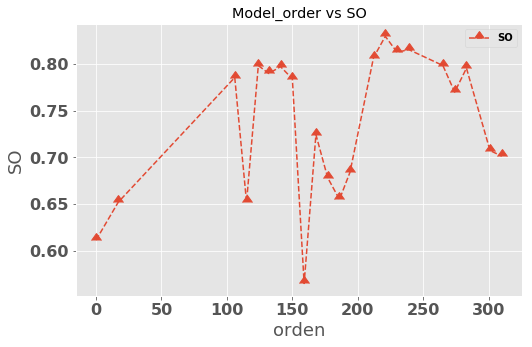

In [42]:
df.plot(x='orden',y='SO', style='.--', marker=10, figsize=(8,5),title='Model_order vs SO',ms=10)
plt.ylabel('SO')

Text(0,0.5,'RMSD')

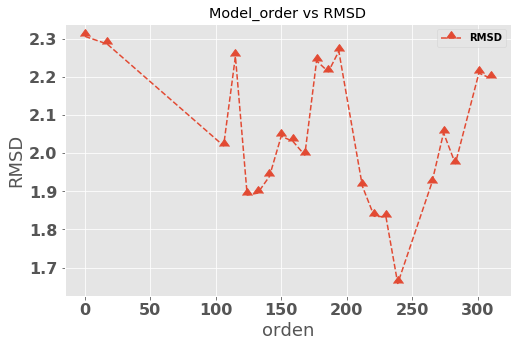

In [43]:
df.plot(x='orden',y='RMSD', style='.--', marker=10, figsize=(8,5),title='Model_order vs RMSD',ms=10)
plt.ylabel('RMSD')